In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [8]:
df = pd.read_excel("MOP.xlsx")
df.head()

,GRADE,LOS,EMPLOYEMENT STATUS,ST/SP,DEMOTION,MOP
0,5,26,PERMANENT,TIDAK ADA,TIDAK DEMOSI,ELIGIBLE
1,3,23,PERMANENT,TIDAK ADA,TIDAK DEMOSI,ELIGIBLE
2,4,23,PERMANENT,TIDAK ADA,TIDAK DEMOSI,ELIGIBLE
3,2,23,PERMANENT,TIDAK ADA,TIDAK DEMOSI,ELIGIBLE
4,2,23,PERMANENT,TIDAK ADA,TIDAK DEMOSI,ELIGIBLE


In [9]:
print(df.isnull().sum())

GRADE                 0
LOS                   0
EMPLOYEMENT STATUS    0
ST/SP                 0
DEMOTION              0
MOP                   0
dtype: int64


In [17]:
label_encoder = LabelEncoder()

In [18]:
df['EMPLOYEMENT STATUS'] = label_encoder.fit_transform(df['EMPLOYEMENT STATUS'])
df['ST/SP'] = label_encoder.fit_transform(df['ST/SP'])
df['DEMOTION'] = label_encoder.fit_transform(df['DEMOTION'])
df['MOP'] = label_encoder.fit_transform(df['MOP'])
df.head()

,GRADE,LOS,EMPLOYEMENT STATUS,ST/SP,DEMOTION,MOP
0,5,26,1,1,1,0
1,3,23,1,1,1,0
2,4,23,1,1,1,0
3,2,23,1,1,1,0
4,2,23,1,1,1,0


<Axes: >

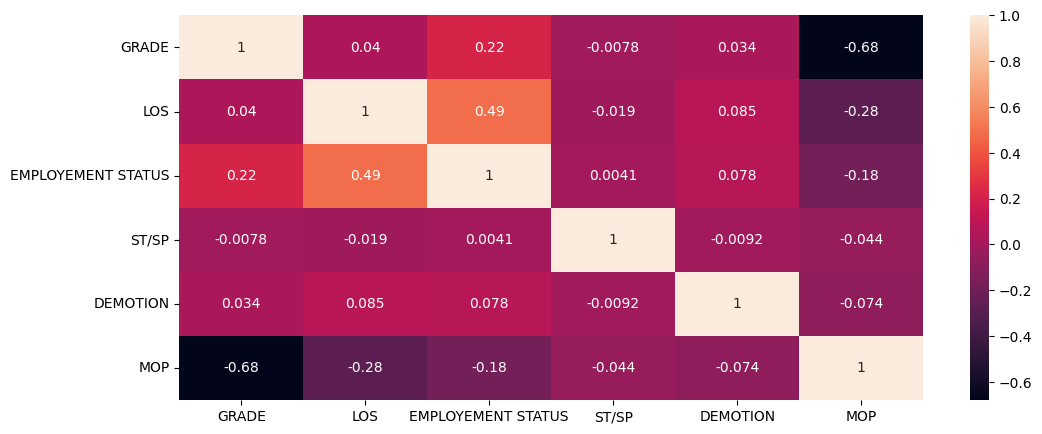

In [19]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), fmt=".2g", annot=True)

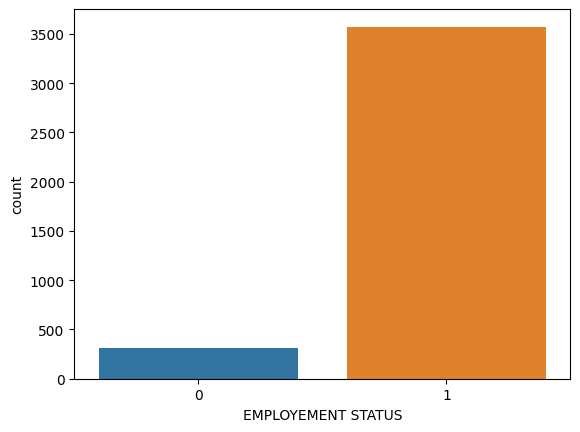

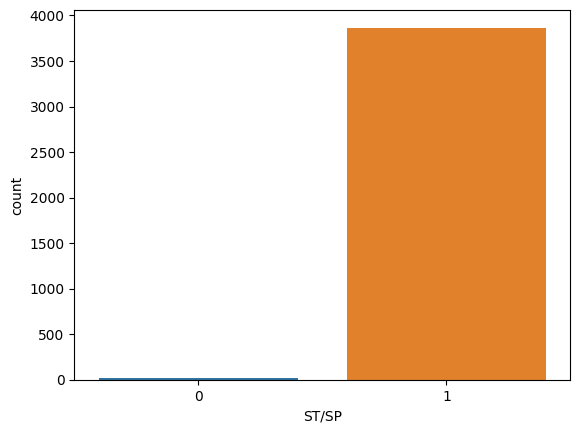

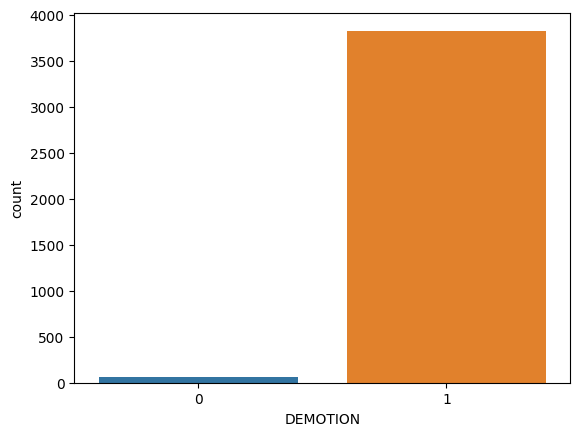

In [20]:
feature = ['EMPLOYEMENT STATUS', 'ST/SP',	'DEMOTION']

for i in feature:
    sns.countplot(x=df[i])
    df[i].value_counts()
    plt.show()

In [21]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

1.0


In [22]:
y_pred = model.predict(xtest)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [23]:
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print('Accuracy:', accuracy)

Precision: 1.0
Recall: 1.0
F1-score: 1.0
Accuracy: 1.0


In [24]:

# INPUT DATA ANDA

#input = ['GRADE', 'LOS', 'EMPLOYEMENT STATUS', 'ST/SP', 'DEMOTION']

input = np.array([[2,	2,	1, 1,0]])
prediction = model.predict(input)
print(prediction)
if (prediction[0]==0):
    print('ELIGIBLE')
else :
    print('TIDAK ELIGIBLE')

[1]
TIDAK ELIGIBLE


c:\Users\uSeR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [25]:
import pickle

In [26]:
filename = 'mopmodel.sav'
pickle.dump(model, open(filename,'wb'))